In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('Pensionny_fond_Indii.xlsx')
print(data.head())
data = data.dropna()
data_numeric = data.select_dtypes(include=[np.number])


   Unnamed: 0       ADR     FR                  GDP
0      1973.0  6.706056  5.402  210419720708.316162
1      1974.0  6.781423  5.325  212913901944.846375
2      1975.0  6.856545  5.195  232395336642.007599
3      1976.0  6.926857  5.130  236260311940.546082
4      1977.0  6.981859  5.007  253400441385.770813


In [15]:
data_normalized = (data_numeric - data_numeric.mean()) / data_numeric.std()
cov_matrix = np.cov(data_normalized.T)


In [17]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
variances = eigenvalues_sorted
print("Дисперсии:", variances)


Дисперсии: [2.81402783e+00 1.85478647e-01 4.93522147e-04]


In [19]:
n_components = 3  
important_indices = sorted_indices[:n_components]
important_features = data_numeric.columns[important_indices]
print("Самые важные признаки:", important_features)


Самые важные признаки: Index(['Unnamed: 0', 'FR', 'ADR'], dtype='object')


In [21]:
sum_selected_variances = np.sum(variances[important_indices])
sum_all_variances = np.sum(variances)
I = sum_selected_variances / sum_all_variances
print("Значение I:", I)


Значение I: 1.0


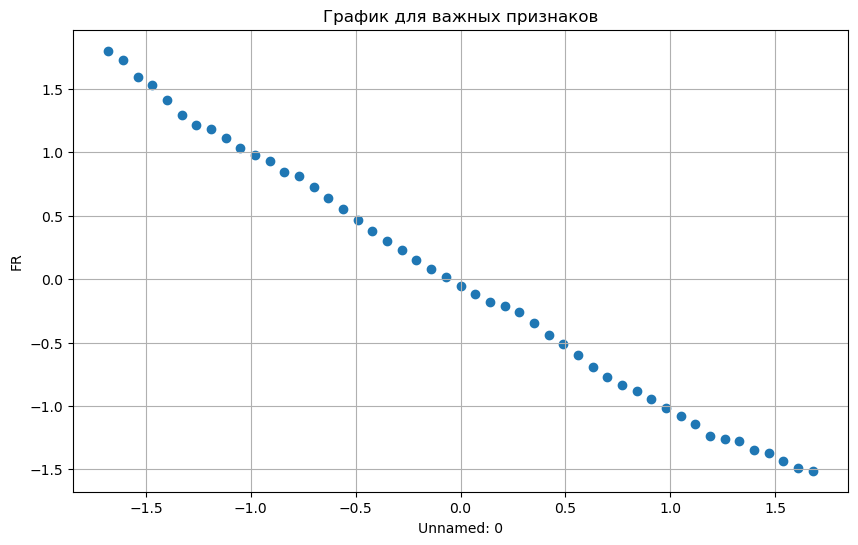

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalized[important_features[0]], data_normalized[important_features[1]])
plt.title('График для важных признаков')
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.grid()
plt.show()
